In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_lifestyle_dataset.csv to student_lifestyle_dataset.csv


In [ ]:
df = pd.read_csv('/content/student_lifestyle_dataset.csv')

In [ ]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [ ]:
df.nunique()

,0
Student_ID,2000
Study_Hours_Per_Day,51
Extracurricular_Hours_Per_Day,41
Sleep_Hours_Per_Day,51
Social_Hours_Per_Day,61
Physical_Activity_Hours_Per_Day,118
GPA,158
Stress_Level,3


In [ ]:
df.isnull().any()

,0
Student_ID,False
Study_Hours_Per_Day,False
Extracurricular_Hours_Per_Day,False
Sleep_Hours_Per_Day,False
Social_Hours_Per_Day,False
Physical_Activity_Hours_Per_Day,False
GPA,False
Stress_Level,False


In [ ]:
df['Stress_Level'] = df['Stress_Level'].map({'High': 2, 'Moderate': 1,'Low':0})
scaler = MinMaxScaler()
df[['Study_Hours_Per_Day','Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day','Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day','GPA']] = scaler.fit_transform(df[['Study_Hours_Per_Day','Extracurricular_Hours_Per_Day','Sleep_Hours_Per_Day','Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day','GPA']])

In [ ]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,0.38,0.950,0.74,0.466667,0.138462,0.426136,1
1,2,0.06,0.875,0.60,0.700000,0.230769,0.289773,0
2,3,0.02,0.975,0.84,0.200000,0.353846,0.244318,0
3,4,0.30,0.525,0.44,0.283333,0.500000,0.363636,1
4,5,0.62,0.150,0.30,0.366667,0.507692,0.721591,2
...,...,...,...,...,...,...,...,...
1995,1996,0.30,0.050,0.48,0.350000,0.600000,0.613636,1
1996,1997,0.26,0.700,0.76,0.250000,0.353846,0.232955,1
1997,1998,0.24,0.000,0.24,0.133333,0.830769,0.511364,1
1998,1999,0.62,0.175,0.52,0.583333,0.315385,0.454545,2


In [ ]:
X = df.drop(['Student_ID','Stress_Level'],axis=1)
y = df['Stress_Level']
X

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,0.38,0.950,0.74,0.466667,0.138462,0.426136
1,0.06,0.875,0.60,0.700000,0.230769,0.289773
2,0.02,0.975,0.84,0.200000,0.353846,0.244318
3,0.30,0.525,0.44,0.283333,0.500000,0.363636
4,0.62,0.150,0.30,0.366667,0.507692,0.721591
...,...,...,...,...,...,...
1995,0.30,0.050,0.48,0.350000,0.600000,0.613636
1996,0.26,0.700,0.76,0.250000,0.353846,0.232955
1997,0.24,0.000,0.24,0.133333,0.830769,0.511364
1998,0.62,0.175,0.52,0.583333,0.315385,0.454545


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
target = df['Stress_Level'].to_numpy().tolist()
stuhpd = df['Study_Hours_Per_Day'].to_numpy().tolist()
ehpd = df['Extracurricular_Hours_Per_Day'].to_numpy().tolist()
sleeppd = df['Sleep_Hours_Per_Day'].to_numpy().tolist()
socialpd = df['Social_Hours_Per_Day'].to_numpy().tolist()
papd = df['Physical_Activity_Hours_Per_Day'].to_numpy().tolist()
gpa = df['GPA'].to_numpy().tolist()
data = list(zip(stuhpd,ehpd,sleeppd,socialpd,papd,gpa))
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(data,target)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

y_pred = knn.predict(x_test)
accrate = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test ,y_pred ,average = 'macro')
f1 = f1_score(y_test,y_pred,average = 'macro')
conf = confusion_matrix(y_test,y_pred)

print(f'Acc: {accrate}')
print(f'Prec: {prec}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
print('confusion M: ')
print(conf)
print(x_test)

Acc: 0.9633333333333334
Prec: 0.95474259701678
Recall: 0.9654947332196189
F1: 0.9599249008310448
confusion M: 
[[ 94   2   0]
 [  5 179   4]
 [  1  10 305]]
      Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
1860                 0.24                          1.000                 0.20   
353                  0.18                          0.550                 0.98   
1333                 0.92                          0.575                 0.66   
905                  0.44                          0.125                 0.52   
1289                 0.80                          0.900                 0.98   
...                   ...                            ...                  ...   
148                  0.72                          0.650                 0.70   
1554                 0.38                          0.375                 0.06   
1956                 0.48                          0.400                 0.32   
925                  0.18        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


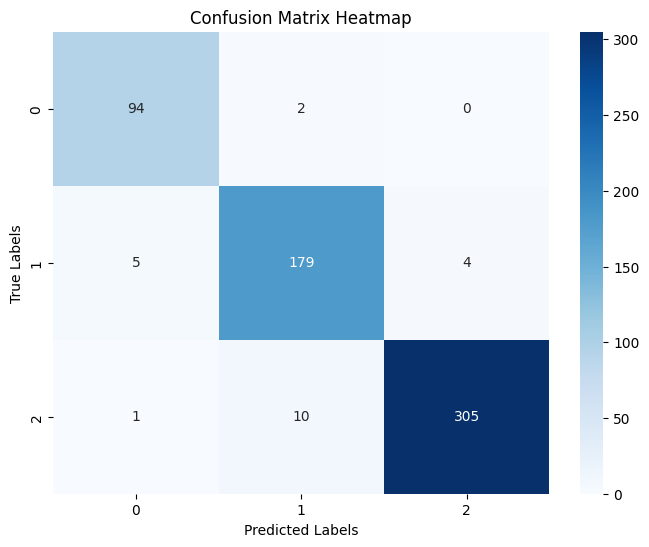

In [ ]:
import seaborn as sns
conf = confusion_matrix(y_test, y_pred)

# สร้าง heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
x_test

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
1860,0.24,1.000,0.20,0.583333,0.330769,0.363636
353,0.18,0.550,0.98,0.933333,0.030769,0.500000
1333,0.92,0.575,0.66,0.583333,0.023077,0.664773
905,0.44,0.125,0.52,0.350000,0.507692,0.494318
1289,0.80,0.900,0.98,0.050000,0.092308,0.539773
...,...,...,...,...,...,...
148,0.72,0.650,0.70,0.383333,0.153846,0.511364
1554,0.38,0.375,0.06,0.683333,0.476923,0.301136
1956,0.48,0.400,0.32,0.450000,0.438462,0.363636
925,0.18,0.400,0.94,0.133333,0.461538,0.352273


In [ ]:
sample = np.array([0.80,0.425,0.46,0.516667,0.223077,0.761364]).reshape(1, -1)

In [ ]:
pred = knn.predict(sample)
cate = ['Low','Moderate','High']
print(pred)
print(cate[pred[0]])

[2]
High


In [ ]:
poly = svm.SVC(kernel='poly',degree=3,C=1)
poly.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [ ]:
print(f'train acc = {str(poly.score(x_train,y_train))}')
print(f'Test acc  = {str(poly.score(x_test,y_test))}')

train acc = 0.9907142857142858
Test acc  = 0.9783333333333334


In [ ]:
poly_pred = poly.predict(x_test)
conf_poly = confusion_matrix(y_test,poly_pred)
prec_poly = precision_score(y_test,poly_pred,average = 'macro')
recall_poly = recall_score(y_test,poly_pred,average = 'macro')
f1_poly = f1_score(y_test,poly_pred,average = 'macro')
print(f'precision : {prec_poly}')
print(f'recall : {recall_poly}')
print(f'f1 : {f1_poly}')
print(f'confusion :')
print(conf_poly)

precision : 0.9769862172521816
recall : 0.968909911123081
f1 : 0.9727911618418812
confusion :
[[ 90   4   2]
 [  1 184   3]
 [  1   2 313]]


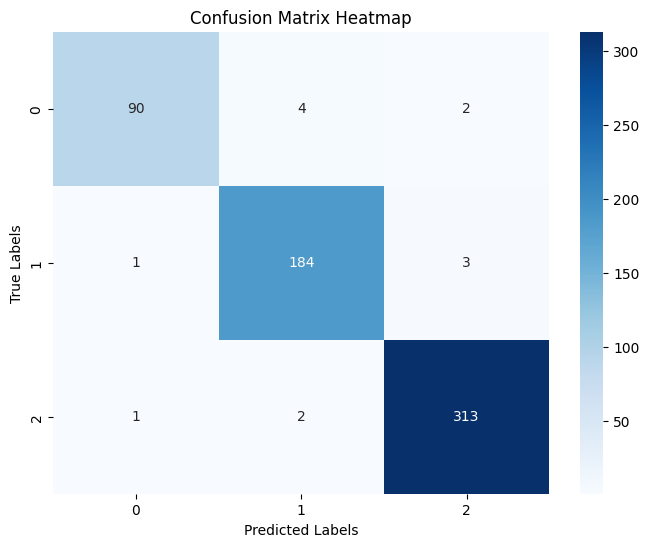

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_poly, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import joblib
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(poly, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
!pip install flask flask-ngrok
